In [1]:
#%matplotlib ipympl

import matplotlib.pyplot as plt
from H_radial_distribution import plot_rad_dist
from H_angular_distribution import plot_angular_dist
from H_orbital_plot import plot_orbital
from IPython.display import display

# Task 1 (20 Points)

1. Perform a simulation for three different values of the quantum number n, starting at n = 1, leaving l at zero. What happens to the maximum of the probability distribution for increasing values of n? (15 pts)

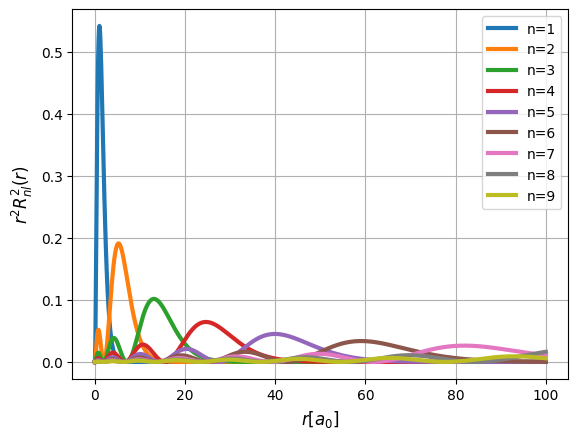

In [2]:
n = [1, 2, 3, 4, 5, 6, 7, 8, 9]

for i in n:
    plot_rad_dist(n=i, l = 0)


The maximum of the PDF initially decreases very quickly as n increases, but the rate of decrease then quickly slows down as n continues to increase.

2. Repeat the simulation for a value of l that is not zero. How does the distribution for l <> 0 compare to that for l = 0 for the same value of n? (5 pts)

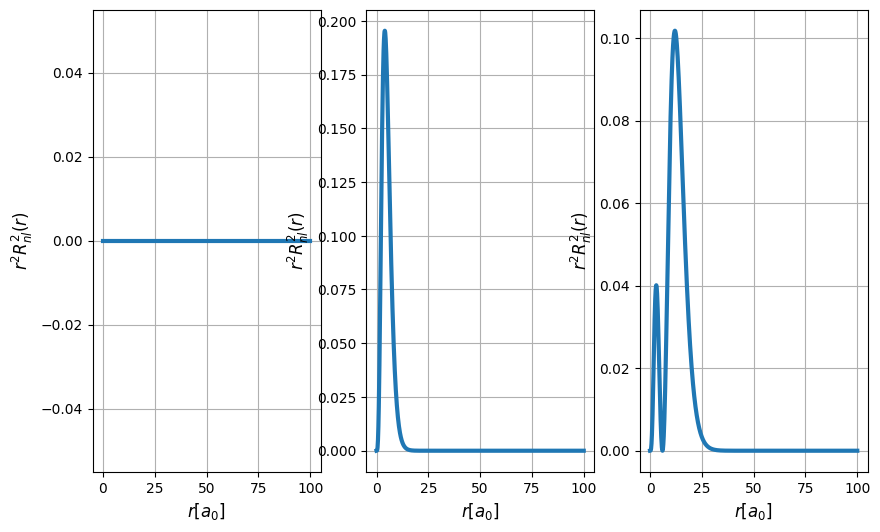

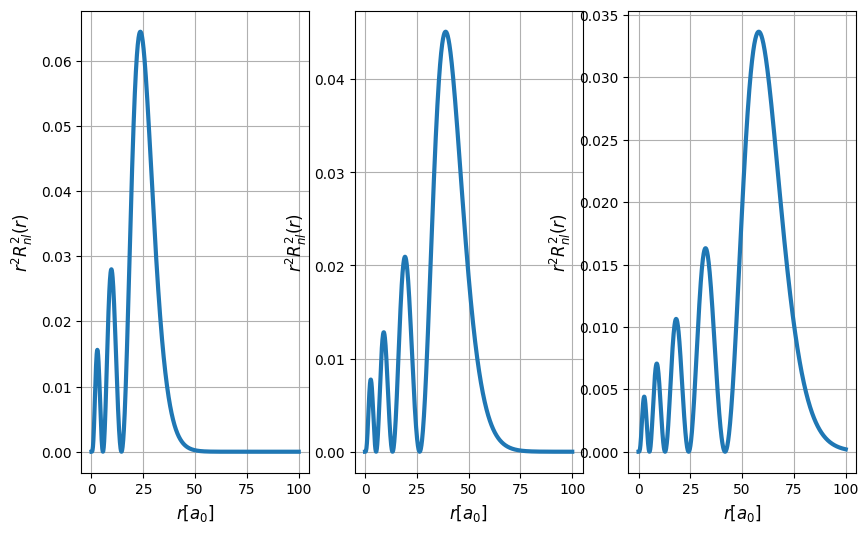

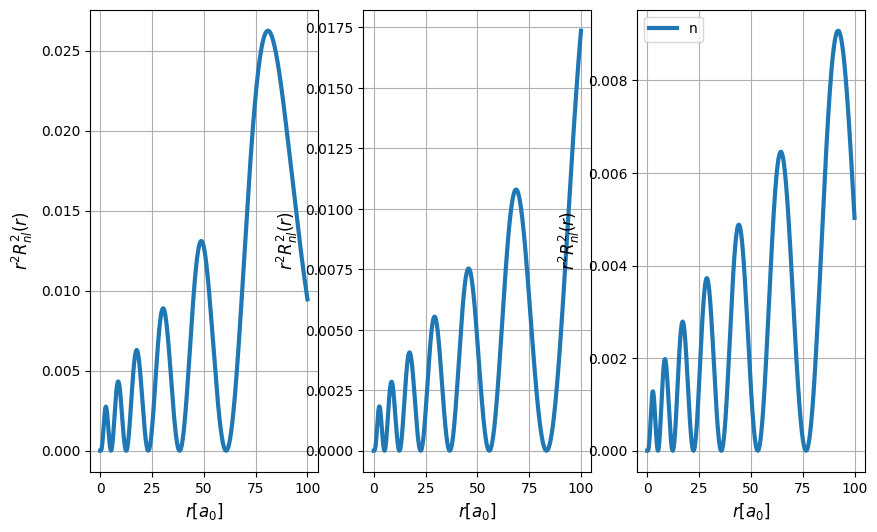

In [7]:
fig1, axs1 = plt.subplots(1, 3, figsize=(10, 6))
fig2, axs2 = plt.subplots(1, 3, figsize=(10, 6))
fig3, axs3 = plt.subplots(1, 3, figsize=(10, 6))


n1 = [1, 2, 3]
n2 = [4, 5, 6]
n3 = [7, 8, 9]

l = 1

for i, ax in enumerate(axs1):
    plot_rad_dist(n=n1[i], l = l, ax = ax)
    

for i, ax in enumerate(axs2):
    plot_rad_dist(n=n2[i], l = l, ax = ax)
    
for i, ax in enumerate(axs3):
    plot_rad_dist(n=n3[i], l = l, ax = ax)

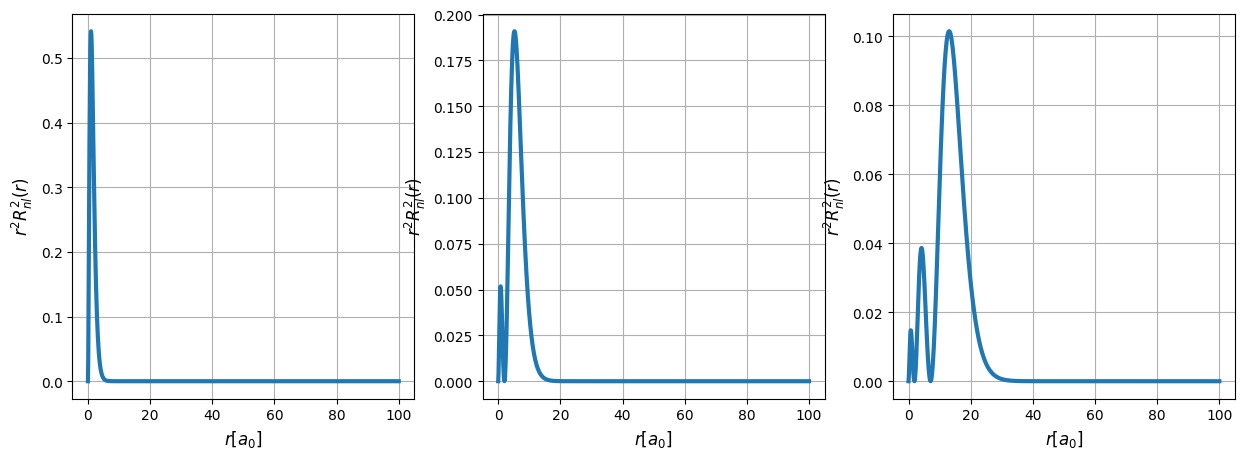

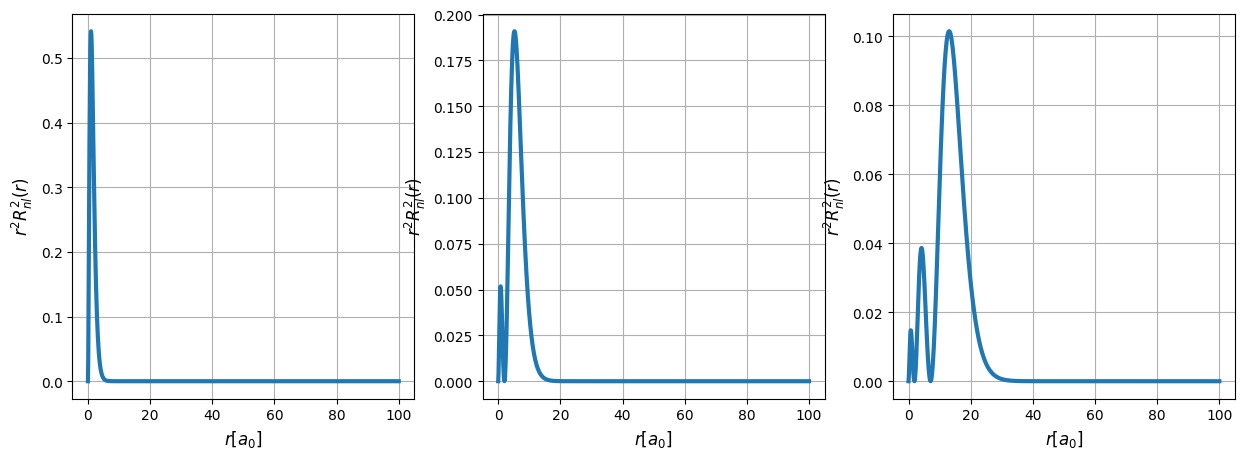

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as spe

def psi_R(r, n=1, l=0):
    coeff = np.sqrt((2.0 / n) ** 3 * spe.factorial(n - l - 1) / (2.0 * n * spe.factorial(n + l)))
    laguerre = spe.assoc_laguerre(2.0 * r / n, n - l - 1, 2 * l + 1)
    return coeff * np.exp(-r / n) * (2.0 * r / n) ** l * laguerre

def plot_rad_dist1(ax, n, l):
    r = np.linspace(0, 100, 1000)
    R = psi_R(r, n=n, l=l)
    ax.plot(r, r ** 2 * R ** 2, lw=3)
    ax.set_xlabel('$r [a_0]$', fontsize=12)
    ax.set_ylabel('$r^2 R^2_{nl}(r)$', fontsize=12)
    ax.grid(True)

n = [1, 2, 3]

fig1, axs1 = plt.subplots(1, 3, figsize=(15, 5))
fig2, axs2 = plt.subplots(1, 3, figsize=(15, 5))

for i, ax in enumerate(axs1):
    plot_rad_dist1(ax, n[i], l=0)

for i, ax in enumerate(axs2):
    plot_rad_dist1(ax, n[i], l=0)

plt.show()


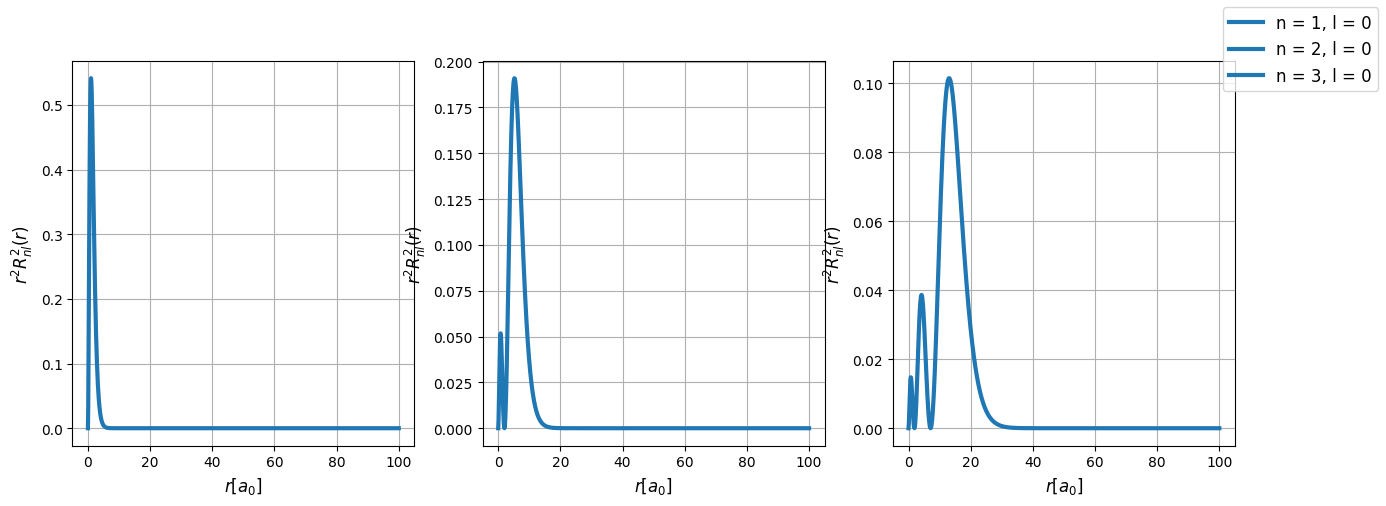

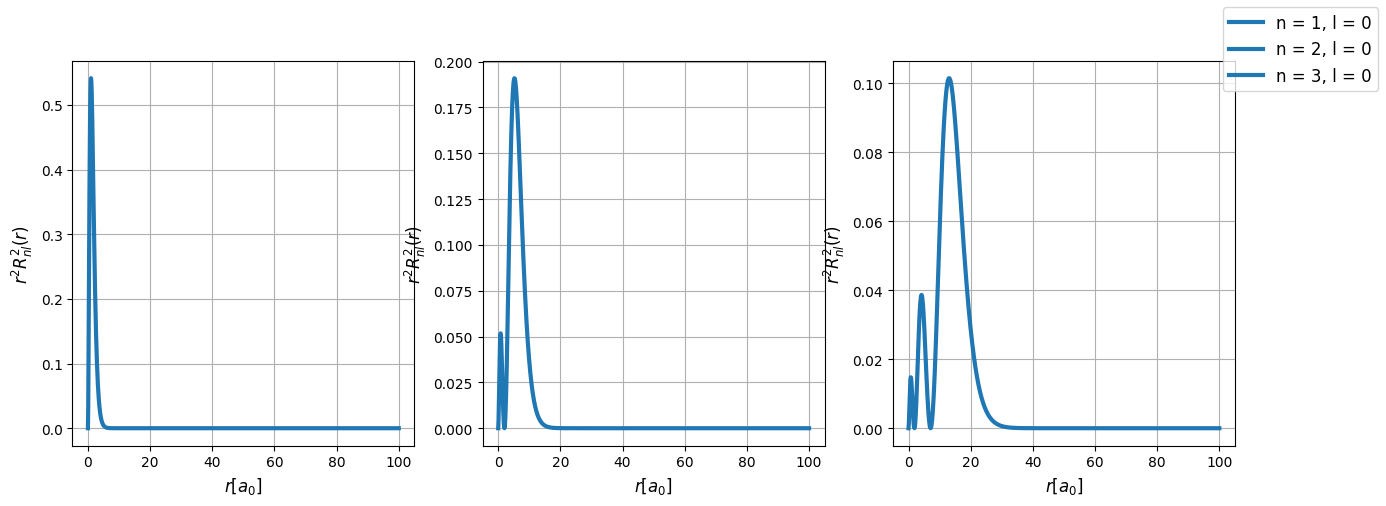

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import vectorize
import scipy.special as spe

def psi_R(r, n=1, l=0):
    coeff = np.sqrt((2.0 / n) ** 3 * spe.factorial(n - l - 1) / (2.0 * n * spe.factorial(n + l)))
    laguerre = spe.assoc_laguerre(2.0 * r / n, n - l - 1, 2 * l + 1)
    return coeff * np.exp(-r / n) * (2.0 * r / n) ** l * laguerre

def plot_rad_dist(ax, n, l):
    r = np.linspace(0, 100, 1000)
    R = psi_R(r, n=n, l=l)
    line, = ax.plot(r, r ** 2 * R ** 2, lw=3, label=f'n = {n}, l = {l}')
    ax.set_xlabel('$r [a_0]$', fontsize=12)
    ax.set_ylabel('$r^2 R^2_{nl}(r)$', fontsize=12)
    ax.grid(True)
    return line

n = [1, 2, 3]

fig1, axs1 = plt.subplots(1, 3, figsize=(15, 5))
fig2, axs2 = plt.subplots(1, 3, figsize=(15, 5))

lines1 = []
for i, ax in enumerate(axs1):
    line = plot_rad_dist(ax, n[i], l=0)
    lines1.append(line)

lines2 = []
for i, ax in enumerate(axs2):
    line = plot_rad_dist(ax, n[i], l=0)
    lines2.append(line)

fig1.legend(handles=lines1, loc='upper right', fontsize=12)
fig2.legend(handles=lines2, loc='upper right', fontsize=12)

plt.show()
